In [171]:
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mplhep as hep
from scipy.optimize import curve_fit
from scipy.stats import norm, crystalball
from scipy import stats
import ROOT

matplotlib.rcParams["figure.dpi"] = 300

sh: cmsrel: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsrel'
sh: cmsenv: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsenv'
sh: cmsrel: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsrel'
sh: cmsenv: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsenv'
sh: cmsrel: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsrel'
sh: cmsenv: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsenv'


Welcome to JupyROOT 6.30/04


sh: cmsrel: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsrel'
sh: cmsenv: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsenv'


In [136]:
input="/work/mmalucch//out_higgs_mass/output_all.coffea"
o=load(input)
col=o["columns"]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018']['baseline']
for k in col.keys():
    col[k]=col[k].value[col[k].value!=-999]


In [137]:
print(col.keys())
print(len(col["RecoHiggs1_mass"][col["RecoHiggs1_mass"]==-999]))
print(len(col["RecoHiggs1_mass"]))


dict_keys(['weight', 'bQuarkHiggsMatched_N', 'bQuarkHiggsMatched_provenance', 'bQuarkHiggsMatched_pdgId', 'bQuarkHiggsMatched_dRMatchedJet', 'bQuarkHiggsMatched_genPartIdxMother', 'bQuarkHiggsMatched_pt', 'bQuarkHiggsMatched_eta', 'bQuarkHiggsMatched_phi', 'bQuarkMatched_N', 'bQuarkMatched_provenance', 'bQuarkMatched_pdgId', 'bQuarkMatched_dRMatchedJet', 'bQuarkMatched_genPartIdxMother', 'bQuarkMatched_pt', 'bQuarkMatched_eta', 'bQuarkMatched_phi', 'bQuark_N', 'bQuark_provenance', 'bQuark_pdgId', 'bQuark_genPartIdxMother', 'bQuark_pt', 'bQuark_eta', 'bQuark_phi', 'JetGoodHiggsMatched_N', 'JetGoodHiggsMatched_provenance', 'JetGoodHiggsMatched_pdgId', 'JetGoodHiggsMatched_dRMatchedJet', 'JetGoodHiggsMatched_pt', 'JetGoodHiggsMatched_eta', 'JetGoodHiggsMatched_phi', 'JetGoodHiggsMatched_btagPNetB', 'JetGoodHiggsMatched_ptPnetRegNeutrino', 'JetGoodHiggsMatched_hadronFlavour', 'JetGoodMatched_N', 'JetGoodMatched_provenance', 'JetGoodMatched_pdgId', 'JetGoodMatched_dRMatchedJet', 'JetGoodMat

(array([4459., 4334., 4558., 4692., 4657., 4785., 4992., 5082., 5162.,
        5217., 5475., 5456., 5618., 5692., 5746., 5911., 6063., 6071.,
        6209., 6313., 6333., 6319., 6495., 6742., 6713., 6738., 6740.,
        7050., 7024., 7184., 7073., 7064., 7219., 7282., 7228., 7144.,
        7280., 7354., 7254., 7241., 7274., 7297., 7128., 7040., 6994.,
        6729., 6794., 6839., 6601., 6537., 6420., 6221., 6204., 5980.,
        5953., 5631., 5460., 5504., 5127., 4990., 4818., 4592., 4318.,
        4114., 4099., 3779., 3715., 3501., 3295., 3142., 2875., 2761.,
        2651., 2528., 2346., 2151., 2021., 1924., 1764., 1650., 1505.,
        1430., 1312., 1202., 1215., 1071., 1031.,  931.,  867.,  789.,
         732.,  662.,  615.,  570.,  516.,  562.,  430.,  431.,  407.,
         351.]),
 array([100. , 100.5, 101. , 101.5, 102. , 102.5, 103. , 103.5, 104. ,
        104.5, 105. , 105.5, 106. , 106.5, 107. , 107.5, 108. , 108.5,
        109. , 109.5, 110. , 110.5, 111. , 111.5, 112. , 112

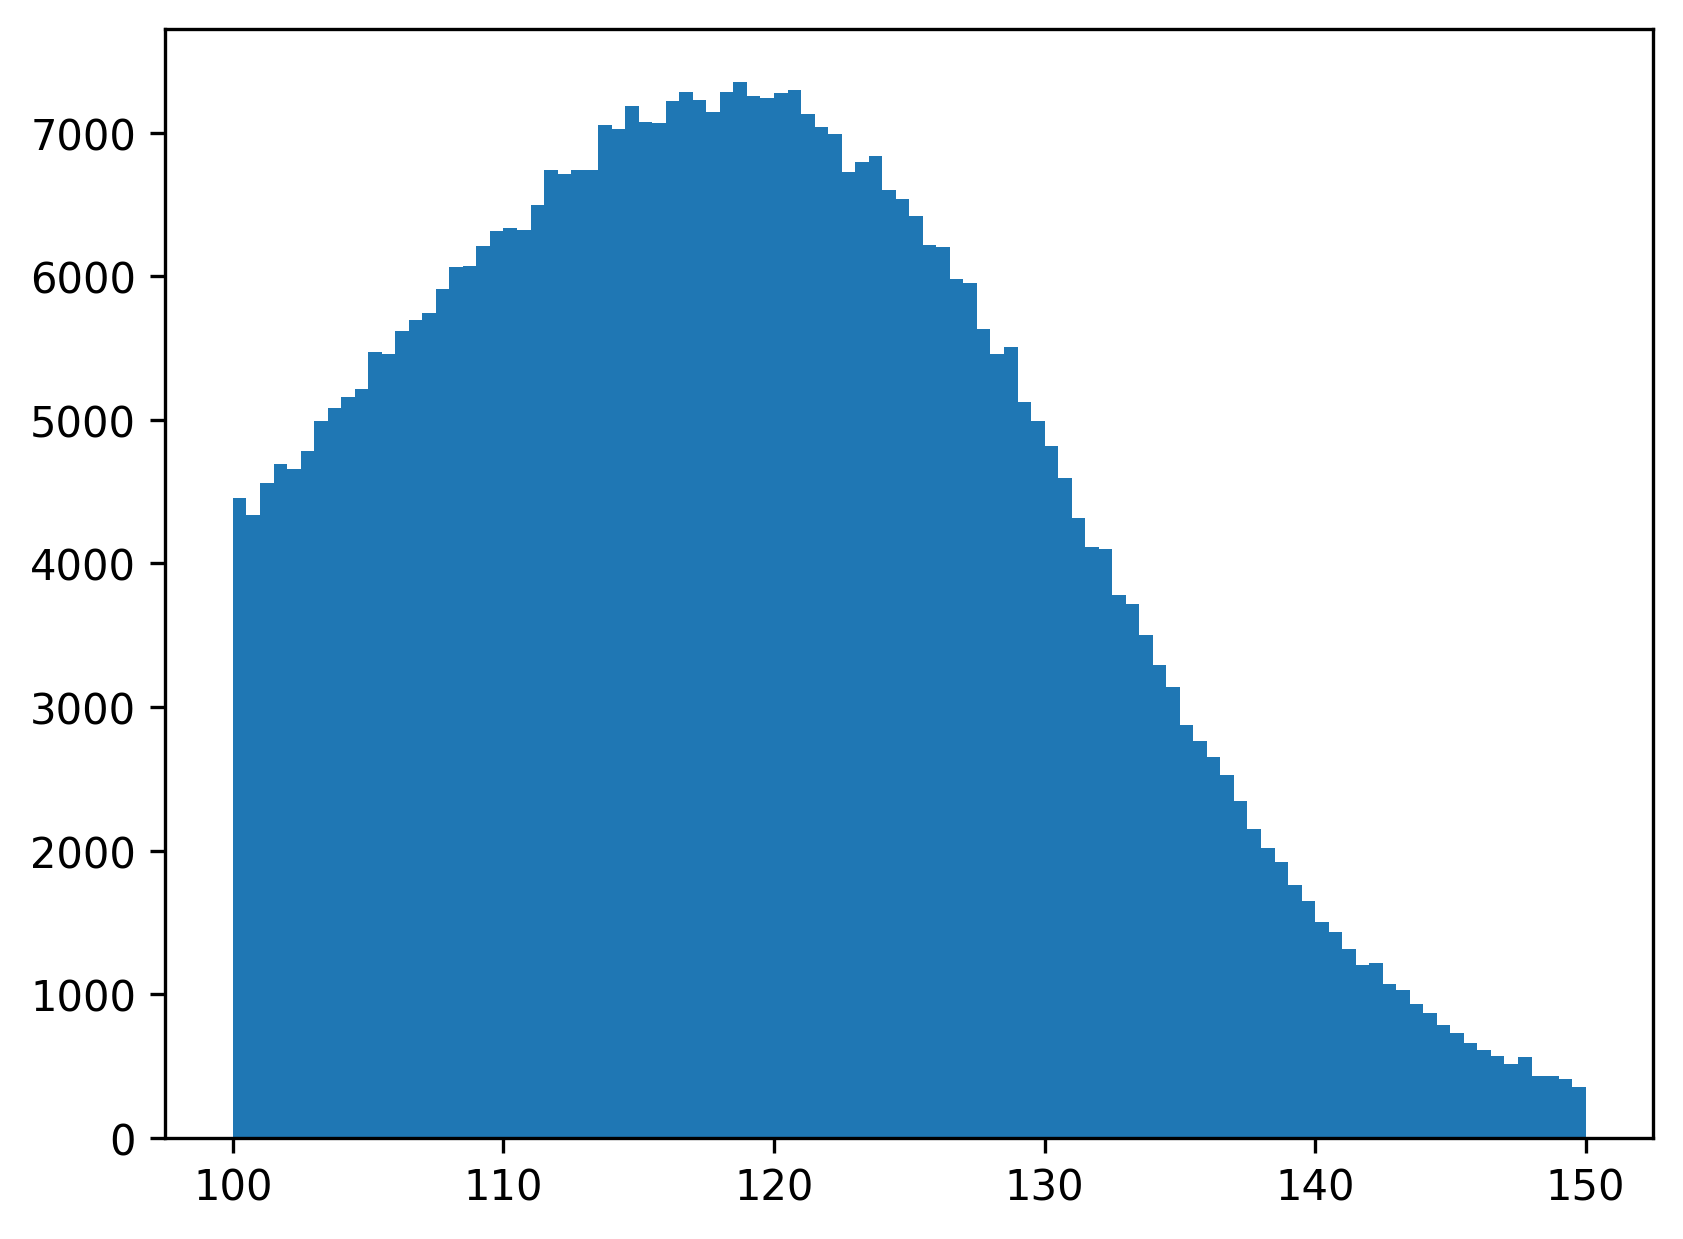

In [138]:
plt.hist((col["RecoHiggs1_mass"]),bins=100,range=(100,150))

[2.93645070e+000 3.19626501e+000 3.48765677e+000 3.81557282e+000
 4.18591991e+000 4.60578917e+000 5.08374271e+000 5.63018226e+000
 6.25782739e+000 6.98234107e+000 7.82315606e+000 8.80457730e+000
 9.95726876e+000 1.13202823e+001 1.29438614e+001 1.48933687e+001
 1.72548724e+001 2.01432201e+001 2.37139221e+001 2.81809899e+001
 3.38443080e+001 4.11326799e+001 5.06734080e+001 6.34083270e+001
 8.07943032e+001 1.05164177e+002 1.40408319e+002 1.93336338e+002
 2.76588560e+002 4.15400958e+002 6.65058072e+002 1.16249748e+003
 2.31015502e+003 4.88714389e+003 8.83202580e+003 1.35571233e+004
 1.76757062e+004 1.95743800e+004 1.84120129e+004 1.47101309e+004
 9.98237359e+003 5.75377816e+003 2.81691939e+003 1.17137982e+003
 4.13735772e+002 1.24122472e+002 3.16285860e+001 6.84559414e+000
 1.25847482e+000 1.96507861e-001 2.60625760e-002 2.93600481e-003
 2.80930052e-004 2.28318787e-005 1.57611213e-006 9.24133227e-008
 4.60239695e-009 1.94686382e-010 6.99502206e-012 2.13473817e-013
 5.53352855e-015 1.218320

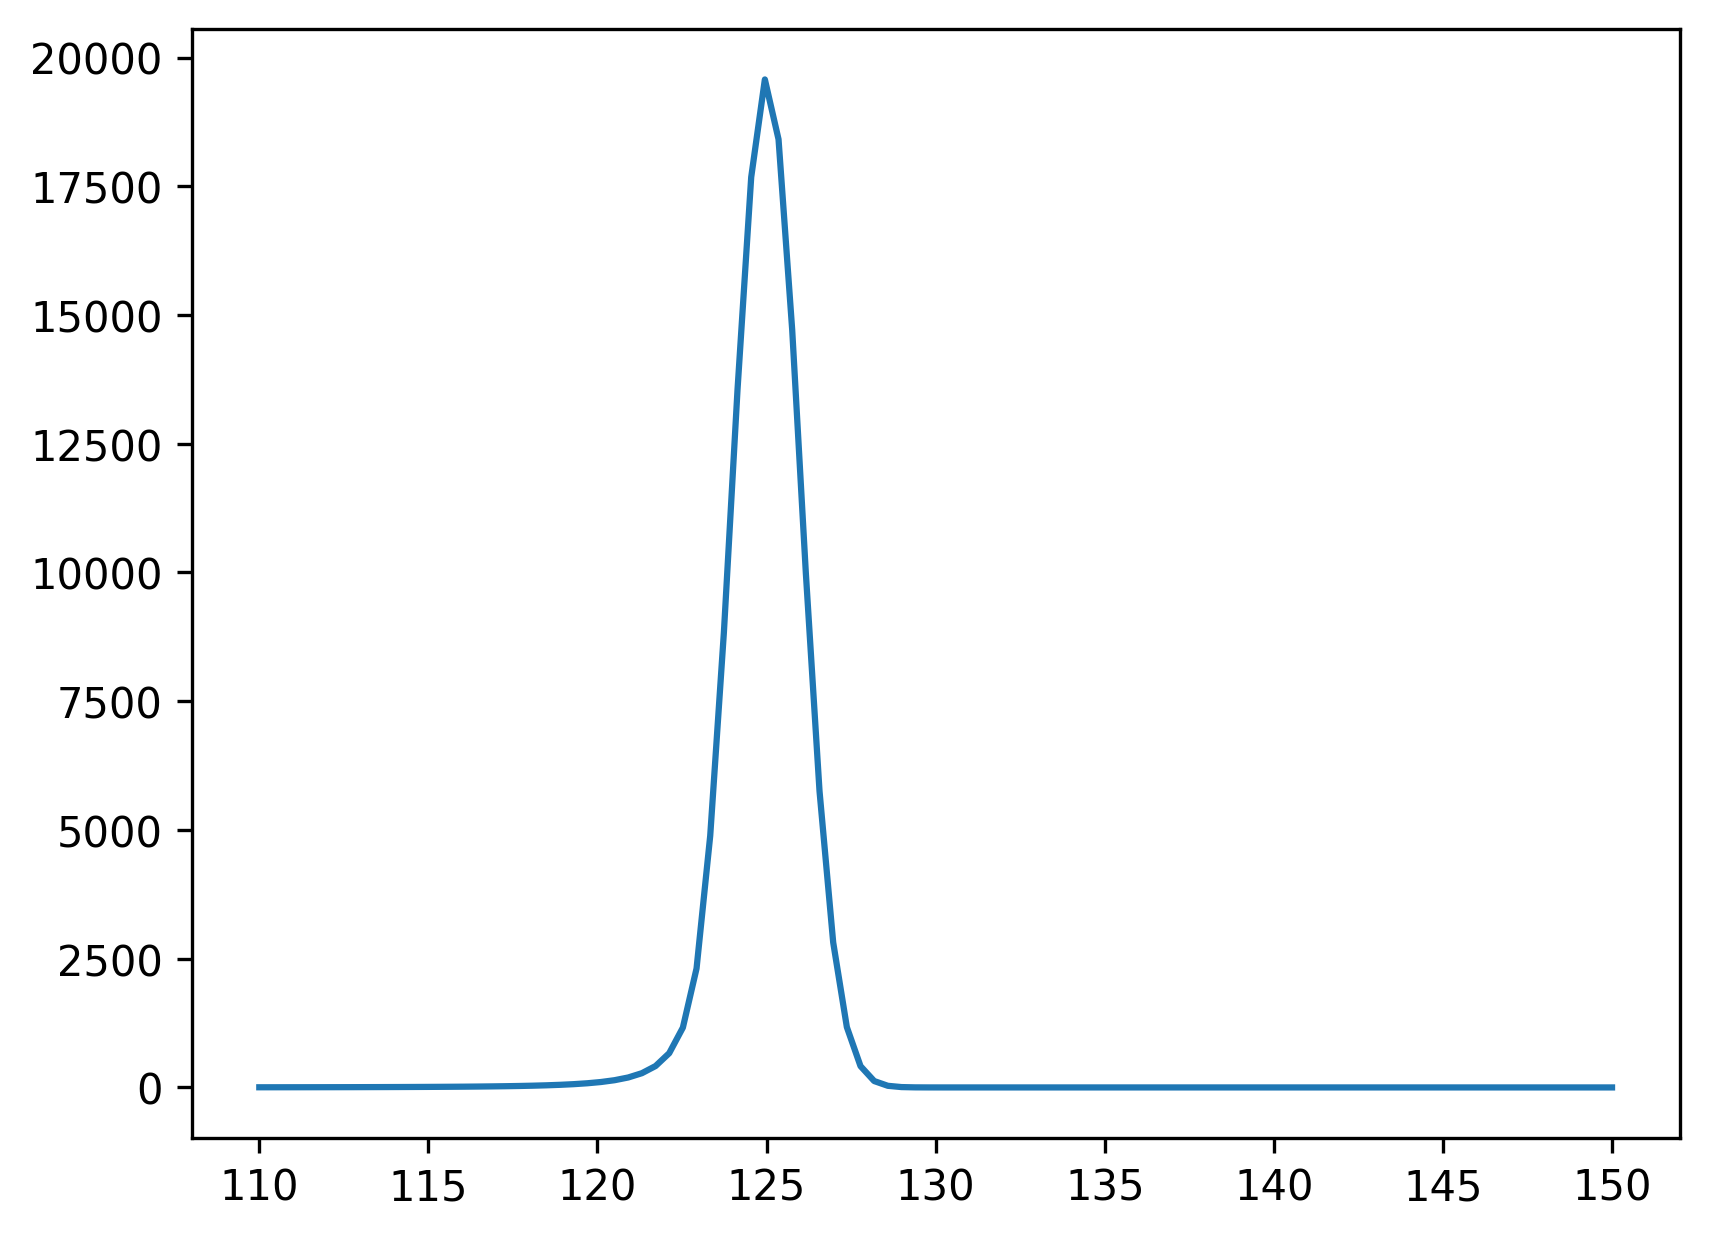

In [139]:
beta, m, loc, scale = 2, 3, 125, 1
fig, ax = plt.subplots(1, 1)
x = np.linspace(110, 150, 100)
print(50000*crystalball.pdf(x, beta, m, loc))
ax.plot(x, 50000*crystalball.pdf(x, beta, m, loc))

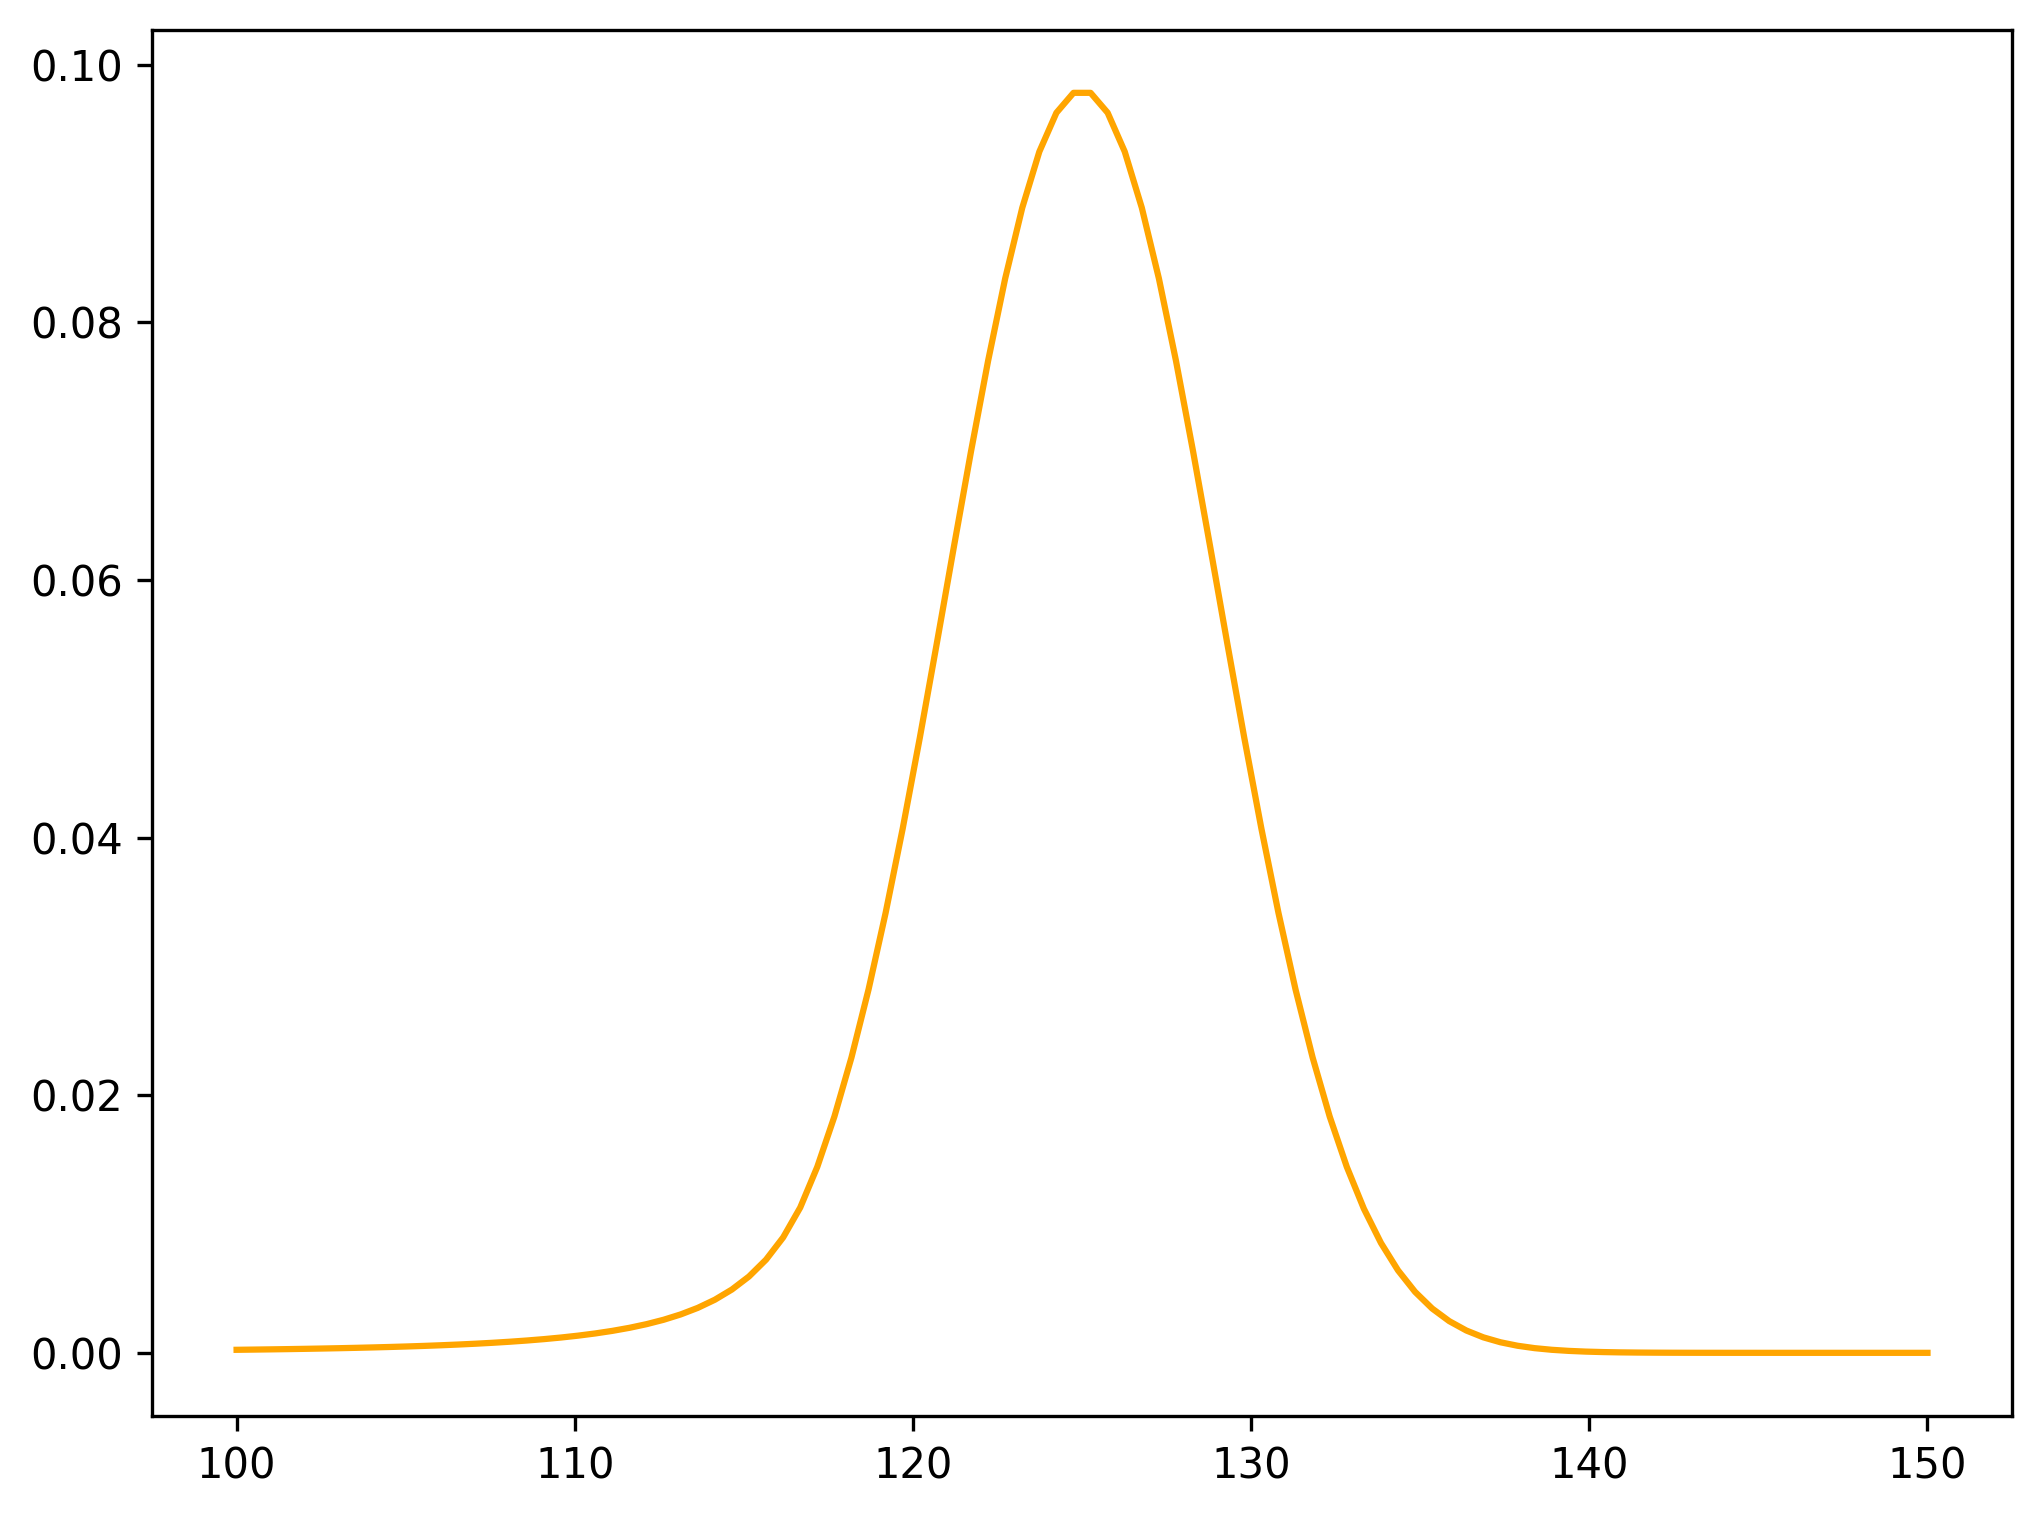

In [140]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp(-(((x - mean) / standard_deviation) ** 2) / 2)


def crystalball_func(x, beta_p, m_p, loc_p, scale_p,amplitude_p):
    return crystalball.pdf(x, beta_p, m_p, loc=loc_p, scale=scale_p)*amplitude_p


fig_test, ax_test = plt.subplots(figsize=(8, 6))
ax_test.plot(
    np.linspace(100, 150, 100),
    crystalball_func(np.linspace(100, 150, 100), 2, 3, 125, 4,1),
    # gaussian(np.linspace(100, 150, 100), 125, 1, 1),
    label="crystalball_func fit reco",
    color="orange",
)
fig_test.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


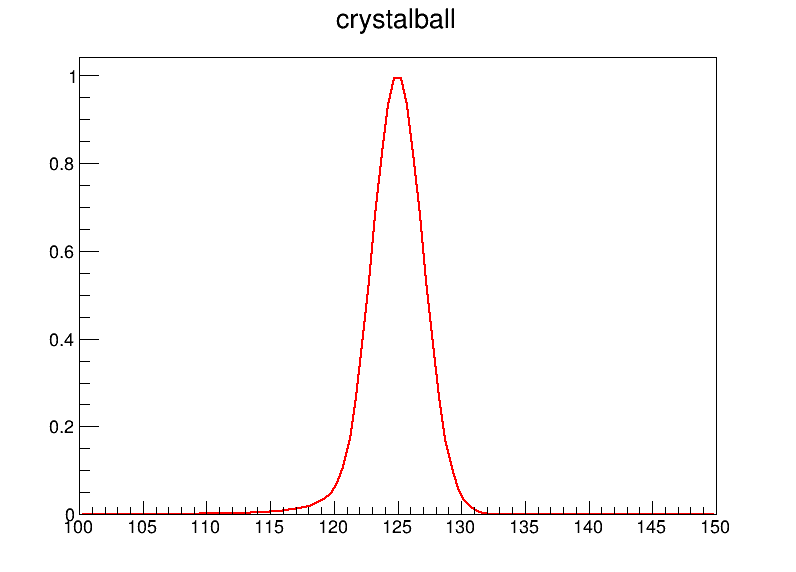

In [241]:
# plot crystalball function
c1=ROOT.TCanvas("c1","c1",800,600)
c1.cd()
f1=ROOT.TF1("f1","crystalball",100,150)
f1.SetParameters(1, 125, 2, 2, 2.5)
f1.Draw()
c1.Draw()


In [242]:
def fit_cb_chi2(ax, arr, bins, p0_array, color):
    n, bin_edges = np.histogram(arr, bins, density=True)
    bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
    # ax.plot(bin_centres, crystalball_func(bin_centres,100,20,125,5e4), label="crystalball_func fit reco", color="orange")
    popt, pcov = curve_fit(crystalball.pdf, bin_centres, n, p0=p0_array)
    ax.plot(
        bin_centres,
        crystalball.pdf(bin_centres, *popt),
        label="crystalball.pdf fit reco",
        color=color,
    )
    print(popt)
    mean, std_dev = popt[2], popt[3]
    err_mean, err_std_dev = np.sqrt(pcov[2, 2]), np.sqrt(pcov[3, 3])

    print(f"mean: {mean} +- {err_mean}, std_dev: {std_dev} +- {err_std_dev}")

    # compute chi2
    chi2 = np.sum(
        (n - crystalball.pdf(bin_centres, *popt)) ** 2
        / crystalball.pdf(bin_centres, *popt)
    )

    print(
        (n - crystalball.pdf(bin_centres, *popt)) / crystalball.pdf(bin_centres, *popt)
    )
    dof = len(n) - len(popt)
    p_value = 1 - stats.chi2.cdf(chi2, dof)
    print(f"chi2: {chi2}, dof: {dof}, p_value: {p_value}")

    return mean, std_dev, err_mean, err_std_dev, chi2 / dof, p_value


def fit_cb_ML(ax, arr, bins, p0_array, color):
    # root histogram
    h = ROOT.TH1F("h", "h", len(bins) - 1, bins)
    for i in range(len(arr)):
        h.Fill(arr[i] / h.GetBinWidth(i))
    # crystalball fit
    # canvas = ROOT.TCanvas("canvas", "canvas")
    f = ROOT.TF1("f", "crystalball", bins[0], bins[-1])
    f.SetParameters(*p0_array)
    h.Fit(f, "L S")
    # h.Draw()
    # f.Draw("same")
    # canvas.Draw()
    # get the fit parameters
    mean = f.GetParameter(4)
    std_dev = f.GetParameter(3)
    err_mean = f.GetParError(4)
    err_std_dev = f.GetParError(3)
    chi2 = f.GetChisquare()
    p_value = f.GetProb()
    # plot the fit
    x = np.linspace(bins[0], bins[-1], 100)
    y = np.array([f.Eval(i) for i in x])

    ax.plot(x, y, label="crystalball fit reco", color=color)
    print(f"mean: {mean} +- {err_mean}, std_dev: {std_dev} +- {err_std_dev}")
    print(f"chi2: {chi2}, p_value: {p_value}")

    return mean, std_dev, err_mean, err_std_dev, chi2, p_value


def plot_histos(bins, reco, pnet, pnet_neutrino, num):
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.xlabel(f"Higgs{num}Mass [GeV]")
    ax.hist(
        reco,
        bins,
        label=f"RecoHiggs{num}Mass",
        color="blue",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.hist(
        pnet,
        bins,
        label=f"PNetRegRecoHiggs{num}Mass",
        color="red",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.hist(
        pnet_neutrino,
        bins,
        label=f"PNetRegNeutrinoRecoHiggs{num}Mass",
        color="green",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.legend(loc="upper right")

    # reco_range = reco[(reco > bins[0]) & (reco < bins[-1])]
    # pnet_range = pnet[(pnet > bins[0]) & (pnet < bins[-1])]
    # pnet_neutrino_range = pnet_neutrino[(pnet_neutrino > bins[0]) & (pnet_neutrino < bins[-1])]
    # ax.text(
    #     0.75,
    #     0.5,
    #     "mean reco: {:.2f}\nmean pnet: {:.2f}\nmean pnet neutrino: {:.2f}\nstd dev reco: {:.2f}\nstd dev pnet: {:.2f}\nstd dev pnet neutrino: {:.2f}".format(
    #         np.mean(reco_range),
    #         np.mean(pnet_range),
    #         np.mean(pnet_neutrino_range),
    #         np.std(reco_range),
    #         np.std(pnet_range),
    #         np.std(pnet_neutrino_range),
    #     ),
    #     horizontalalignment="center",
    #     verticalalignment="center",
    #     transform=ax.transAxes,
    # )

    (
        mean_reco,
        std_dev_reco,
        err_mean_reco,
        err_std_dev_reco,
        chi2_reco,
        p_value_reco,
    ) = fit_cb_ML(ax, reco, bins, [1, 125, 4, 5, 2.5], "blue")
    (
        mean_pnet,
        std_dev_pnet,
        err_mean_pnet,
        err_std_dev_pnet,
        chi2_pnet,
        p_value_pnet,
    ) = fit_cb_ML(ax, pnet, bins, [1, 125, 4, 5, 2.5], "red")
    (
        mean_pnet_neutrino,
        std_dev_pnet_neutrino,
        err_mean_pnet_neutrino,
        err_std_dev_pnet_neutrino,
        chi2_pnet_neutrino,
        p_value_pnet_neutrino,
    ) = fit_cb_ML(ax, pnet_neutrino, bins, [1, 125, 2, 5, 2.5], "green")

    # p0_array = [2.5, 5, 125, 4,5e4]
    #  [2.5, 5, 2, 125]

    # # fit the reco
    # n, bin_edges = np.histogram(reco, bins)
    # bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
    # # ax.plot(bin_centres, crystalball_func(bin_centres,100,20,125,5e4), label="crystalball_func fit reco", color="orange")
    # popt, pcov = curve_fit(crystalball_func, bin_centres, n, p0=p0_array)
    # ax.plot(
    #     bin_centres,
    #     crystalball_func(bin_centres, *popt),
    #     label="crystalball_func fit reco",
    #     color="blue",
    # )
    # print(popt)
    # mean_reco, std_dev_reco = popt[2], popt[3]

    # # fit the pnet
    # n, bin_edges = np.histogram(pnet, bins)
    # bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
    # popt, pcov = curve_fit(crystalball_func, bin_centres, n, p0=p0_array)
    # ax.plot(
    #     bin_centres,
    #     crystalball_func(bin_centres, *popt),
    #     label="crystalball_func fit pnet",
    #     color="red",
    # )
    # print(popt)
    # mean_pnet, std_dev_pnet = popt[2], popt[3]

    # # fit the pnet neutrino
    # n, bin_edges = np.histogram(pnet_neutrino, bins)
    # bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
    # popt, pcov = curve_fit(crystalball_func, bin_centres, n, p0=[2.5, 5, 125, 2,5e4])
    # ax.plot(
    #     bin_centres,
    #     crystalball_func(bin_centres, *popt),
    #     label="crystalball_func fit pnet neutrino",
    #     color="green",
    # )
    # print(popt)
    # mean_pnet_neutrino, std_dev_pnet_neutrino = popt[2], popt[3]

    ax.text(
        0.25,
        0.7,
        "mean reco: {:.2f} +- {:.2f}\nmean pnet: {:.2f} +- {:.2f}\nmean pnet neutrino: {:.2f} +- {:.2f}\nstd dev reco: {:.2f} +- {:.2f}\nstd dev pnet: {:.2f} +- {:.2f}\nstd dev pnet neutrino: {:.2f} +- {:.2f}".format(
            # \nchi2/dof reco: {:.2f}\nchi2/dof pnet: {:.2f}\nchi2/dof pnet neutrino: {:.2f} \np_value reco: {:.2f}\np_value pnet: {:.2f}\np_value pnet neutrino: {:.2f}".format(
            mean_reco,
            err_mean_reco,
            mean_pnet,
            err_mean_pnet,
            mean_pnet_neutrino,
            err_mean_pnet_neutrino,
            std_dev_reco,
            err_std_dev_reco,
            std_dev_pnet,
            err_std_dev_pnet,
            std_dev_pnet_neutrino,
            err_std_dev_pnet_neutrino,
            # chi2_reco,
            # chi2_pnet,
            # chi2_pnet_neutrino,
            # p_value_reco,
            # p_value_pnet,
            # p_value_pnet_neutrino,
        ),
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )

    hep.cms.label(
        year="2022",
        com="13.6",
        # label=f"Private Work ({correct_eta_bins[i]} <"
        # + r"$\eta^{Gen}$"
        # + f"< {correct_eta_bins[i+1]})",
        label=f"Private Work",
        ax=ax,
    )
    plt.show()

mean: 189245.56684897994 +- 40.25844082690037, std_dev: -4.114971214211679e-05 +- 40.23359348145023
chi2: 92675.5650266385, p_value: 0.0
mean: 2.509382843690901e-05 +- nan, std_dev: -1.4089711430978733 +- nan
chi2: 2317259.974042106, p_value: 0.0
mean: 102.84813464923721 +- 72.13858664353704, std_dev: -2.8331516380148853e-05 +- 9.521103314223408e-08
chi2: 54032.12331281466, p_value: 0.0


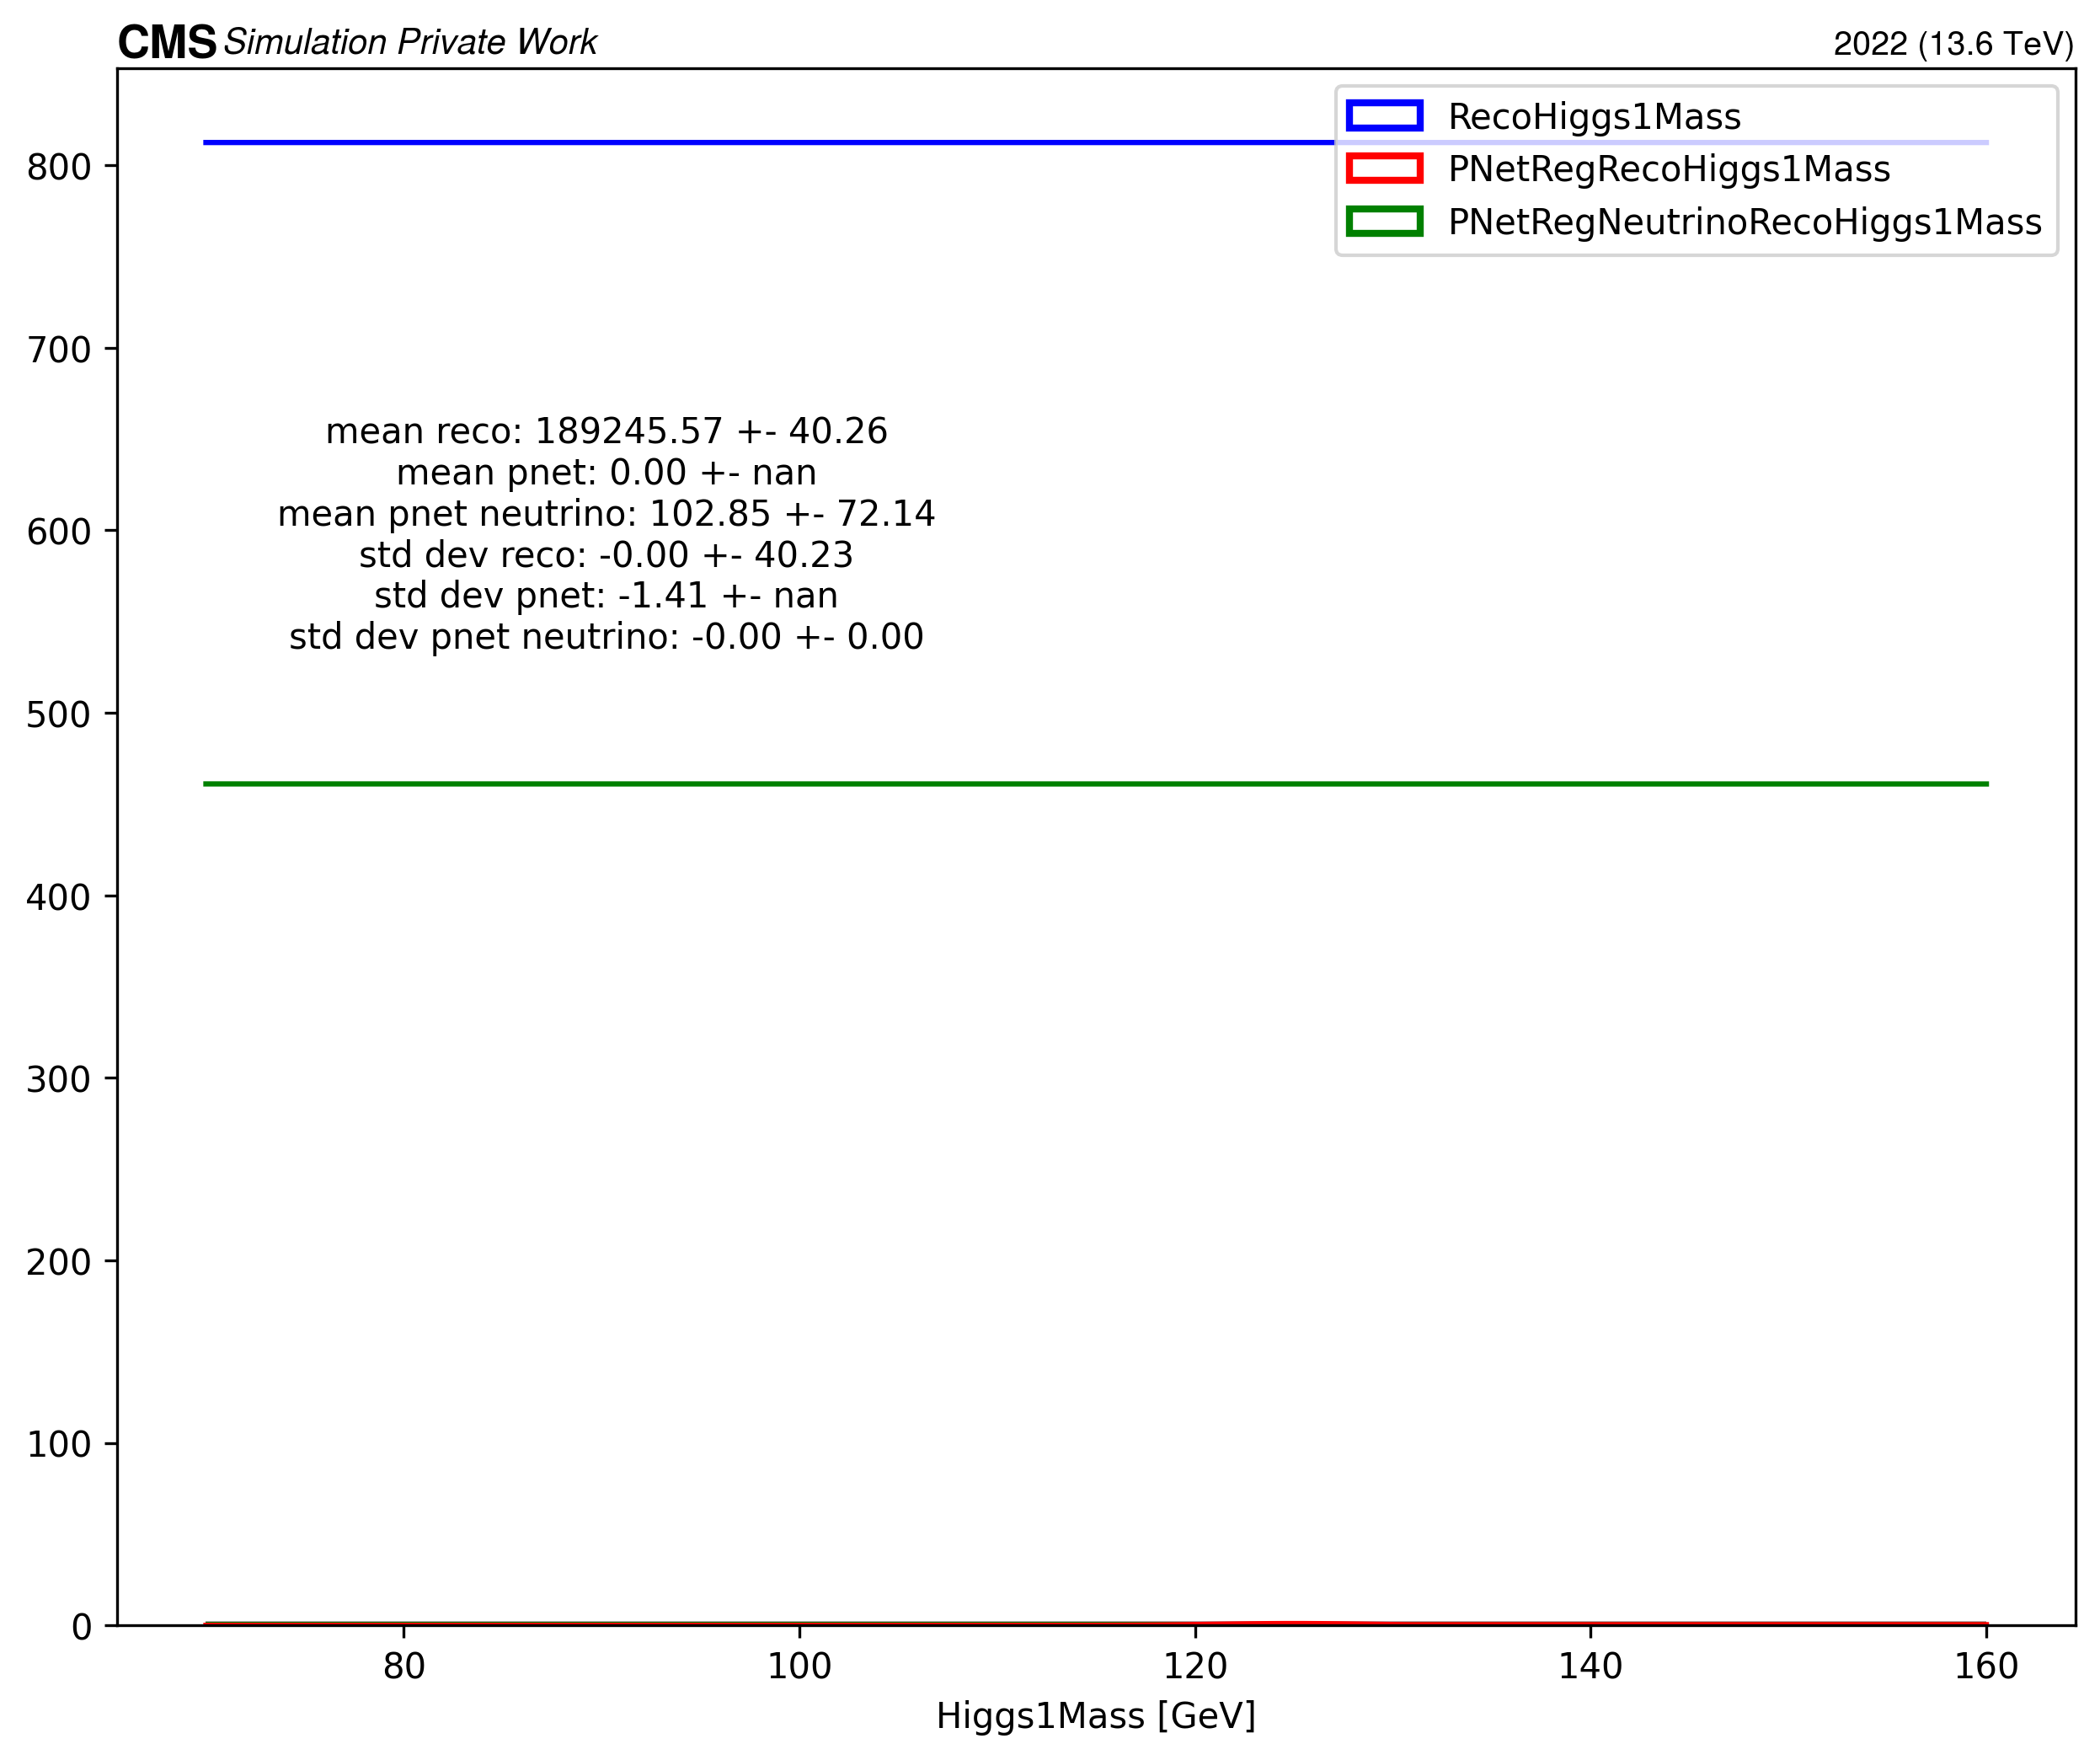

mean: -328743852.84644085 +- 141288.09427560153, std_dev: -2.964415890530147e-05 +- 206.96871815541962
chi2: 95894.01710566062, p_value: 0.0
mean: 4.09686429213821e-05 +- nan, std_dev: -1.4080162728486085 +- nan
chi2: 2347980.3377117952, p_value: 0.0
mean: 4993.505949314665 +- 17703.64221237346, std_dev: 11185.283178749007 +- 947.2564902817214
chi2: 228.5800831442943, p_value: 9.129259211176768e-06


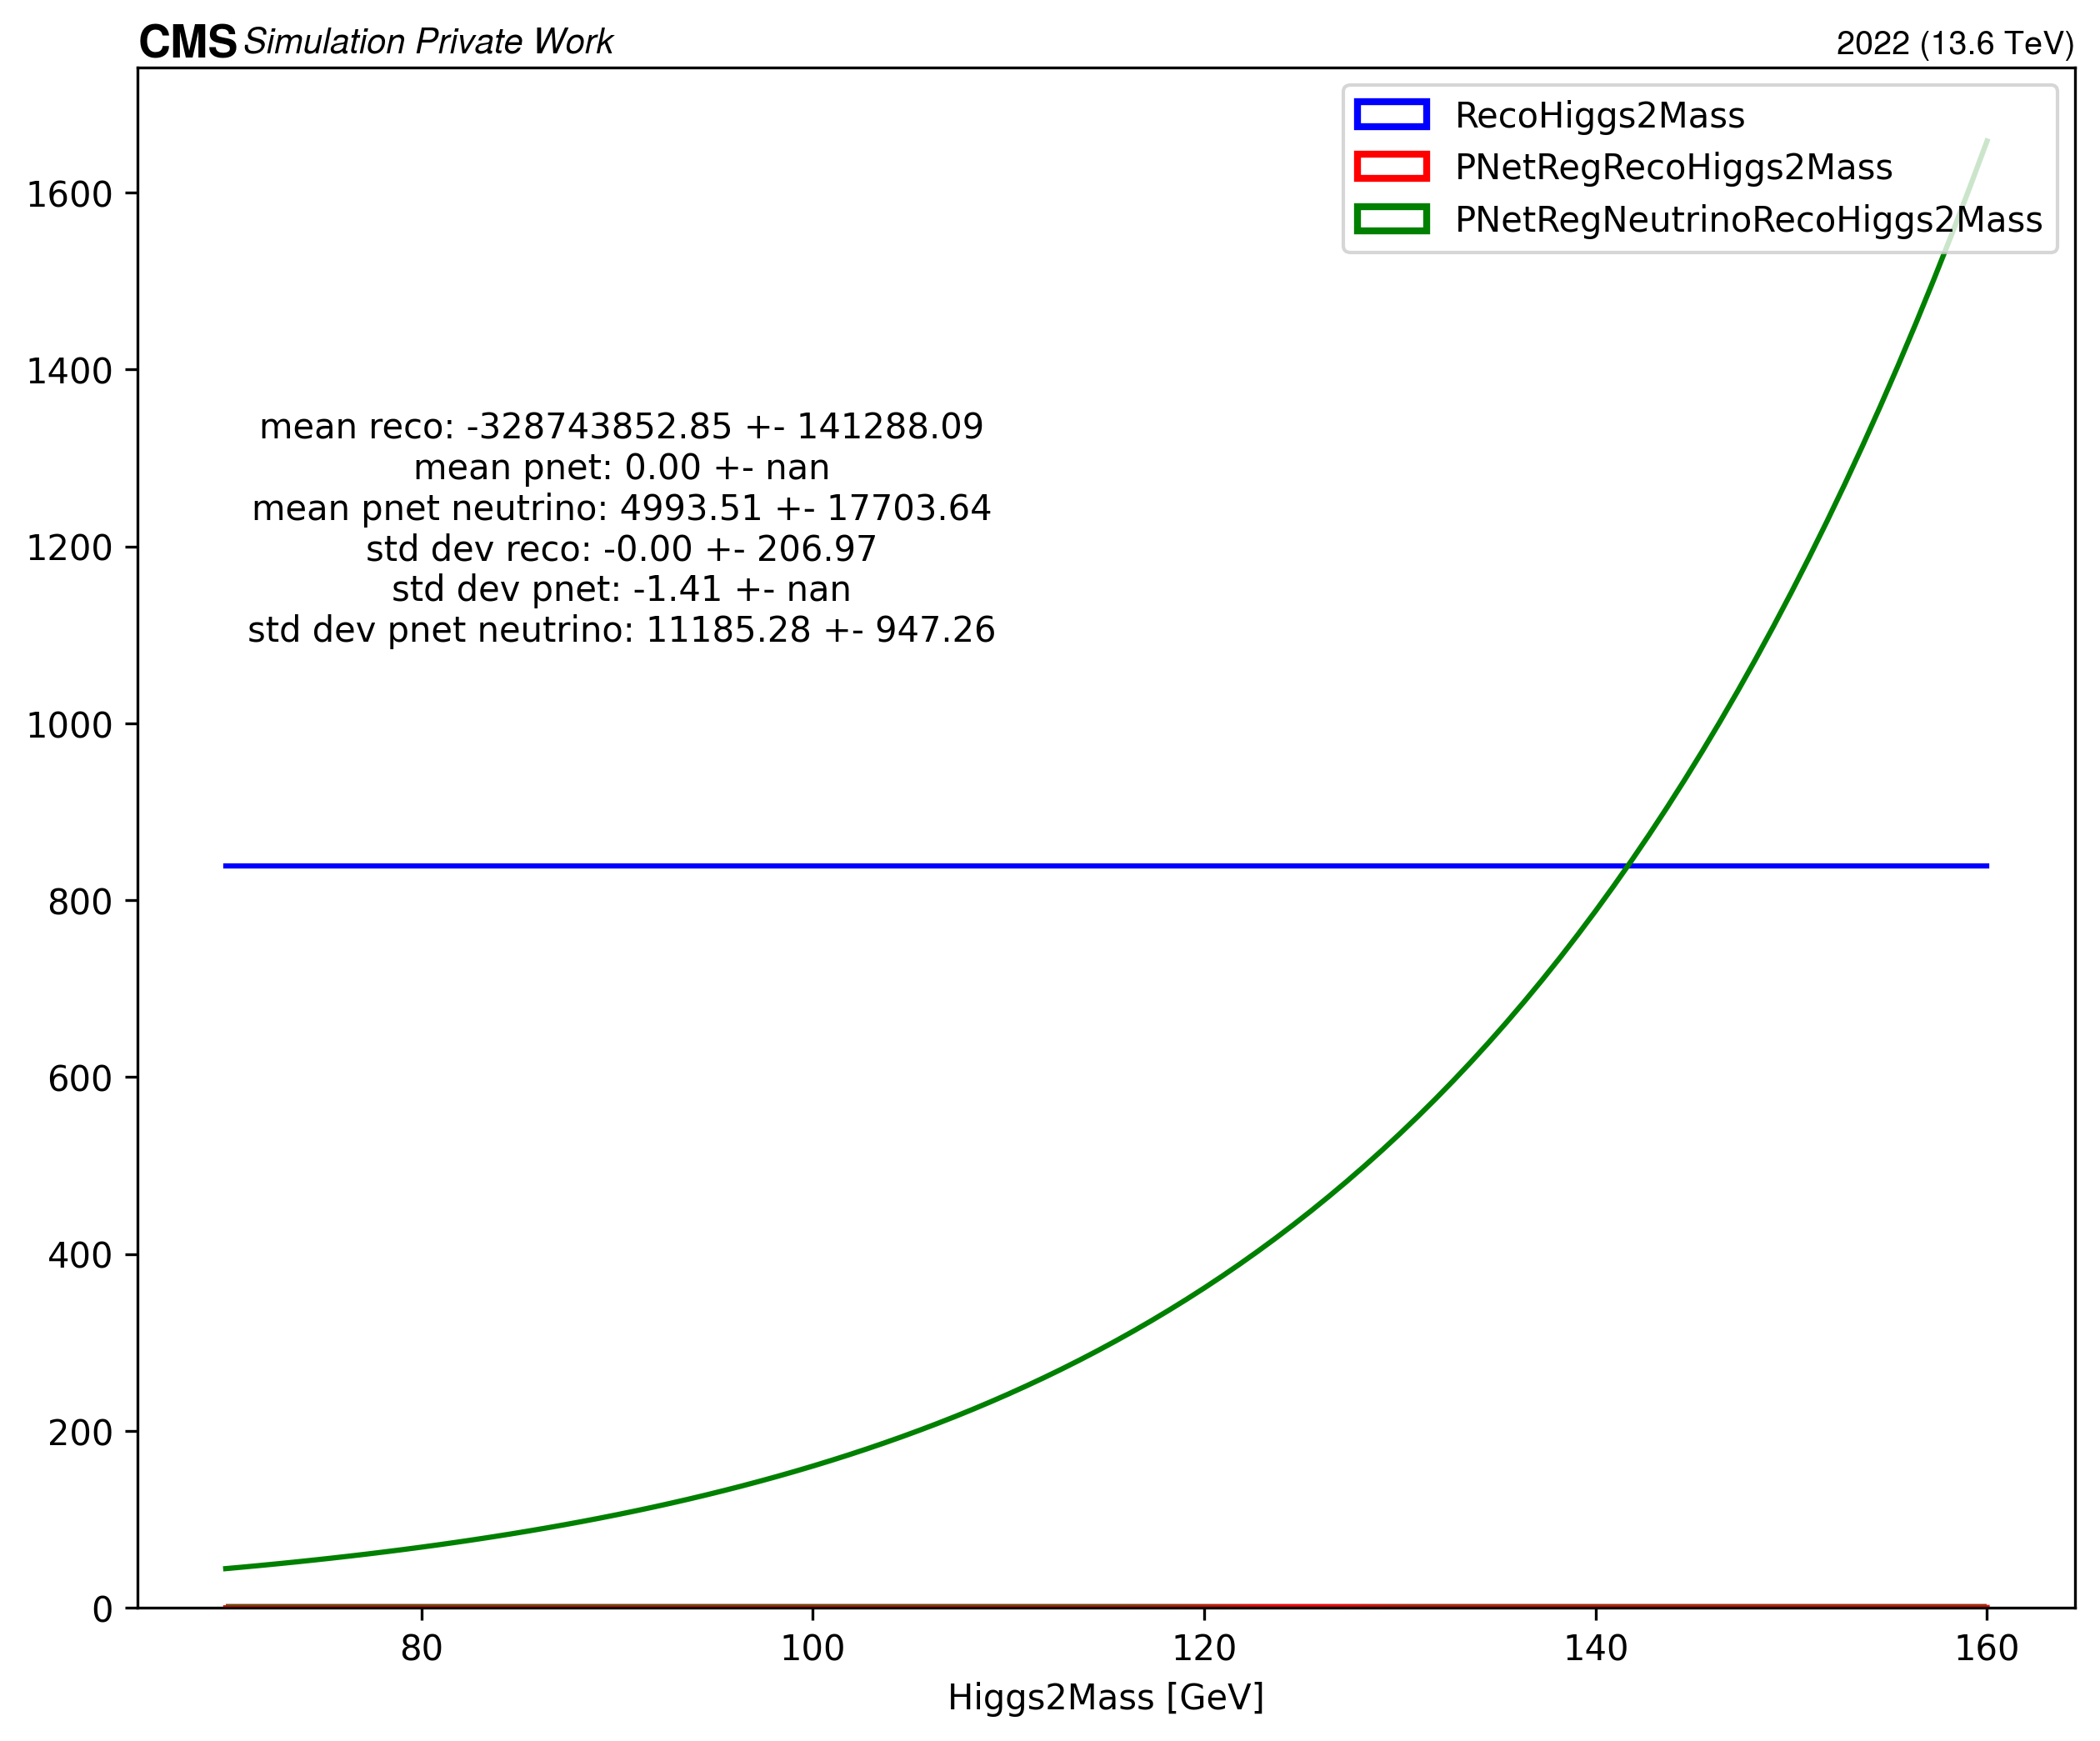

****************************************
         Invalid FitResult  (status = 3 )
****************************************
Minimizer is Minuit2 / Migrad
MinFCN                    =      46337.8
Chi2                      =      92675.6
NDf                       =          144
Edm                       =     0.139071
NCalls                    =          322
Constant                  =       812.95   +/-   0.707107    
Mean                      =     -8577.78   +/-   40.2584     
Sigma                     =      649.775   +/-   40.2579     
Alpha                     = -4.11497e-05   +/-   40.2336     
N                         =       189246   +/-   40.2584     
****************************************
         Invalid FitResult  (status = 3 )
****************************************
Minimizer is Minuit2 / Migrad
MinFCN                    =  1.15863e+06
Chi2                      =  2.31726e+06
NDf                       =          144
NCalls                    =          340
Constant     

Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.


In [243]:
bins = np.linspace(70, 160, 150)
recoHiggs1Mass = col["RecoHiggs1_mass"]
recoHiggs2Mass = col["RecoHiggs2_mass"]
PNetRegRecoHiggs1Mass = col["PNetRegRecoHiggs1_mass"]
PNetRegRecoHiggs2Mass = col["PNetRegRecoHiggs2_mass"]
PNetRegNeutrinoRecoHiggs1Mass = col["PNetRegNeutrinoRecoHiggs1_mass"]
PNetRegNeutrinoRecoHiggs2Mass = col["PNetRegNeutrinoRecoHiggs2_mass"]
plot_histos(
    bins=bins, reco=recoHiggs1Mass, pnet=PNetRegRecoHiggs1Mass, pnet_neutrino=PNetRegNeutrinoRecoHiggs1Mass, num=1
)
plot_histos(
    bins=bins, reco=recoHiggs2Mass, pnet=PNetRegRecoHiggs2Mass, pnet_neutrino=PNetRegNeutrinoRecoHiggs2Mass, num=2
)


In [244]:
# bins=np.linspace(50,1000,300)
# plot_histos(
#     bins=bins, reco=col["RecoHiggs1_pt"], pnet=col["PNetRegRecoHiggs1_pt"], pnet_neutrino=col["PNetRegNeutrinoRecoHiggs1_pt"], num=1
# )
# plot_histos(
#     bins=bins, reco=col["RecoHiggs2_pt"], pnet=col["PNetRegRecoHiggs2_pt"], pnet_neutrino=col["PNetRegNeutrinoRecoHiggs2_pt"], num=2
# )